# Lloyd Banking Group Career Challenge

➢ Task A – Data Strategy : Understand and summarise the different behaviours or attributes between customers who paid back their loan and customers who did not

➢ Task B – Data Science: To use the historical data to design a process which predicts the likelihood of a new customer not paying back their loan

## 1. Understanding the data
This spreadsheet contains some information about Lloyds Banking Group customers (c. 18,324) that have previously had a loan with the bank. There are 31 variables including a unique ID for each customer.


| Field Number | Field Name             | Data Type          |  | Description (optional)                                                                                                                                          |
| ------------ | ---------------------- | ------------------ |  | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|              |                        |                    |  |                                                                                                                                                                 |  |
| 1            | id                     | Unique Identifer   |  | A unique ID for the loan listing.                                                                                                                               |  |
| 2            | addr_state             | Categoric Variable |  | The US state provided by the borrower in the loan application (address)                                                                                         |  |
| 3            | annual_inc             | Numeric Variable   |  | The annual income provided by the borrower during registration.                                                                                                 |  |
| 4            | emp_length             | Categoric Variable |  | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Data captured as categorical. |
| 5            | emp_title              | Categoric Variable |  | The job title supplied by the Borrower when applying for the loan.                                                                                              |  |
| 6            | home_ownership         | Categoric Variable |  | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER                                              |  |
| 7            | installment            | Numeric Variable   |  | The monthly payment owed by the borrower if the loan originates.                                                                                                |  |
| 8            | loan_amnt              | Numeric Variable   |  | The listed amount of the loan applied for by the borrower.                                                                                                      |  |
| 9            | purpose                | Categoric Variable |  | A category provided by the borrower for the loan request.                                                                                                       |  |
| 10           | term                   | Categoric Variable |  | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                            |  |
| 11           | int_rate               | Numeric Variable   |  | Interest Rate on the loan                                                                                                                                       |  |
| 12           | avg_cur_bal            | Numeric Variable   |  | Average current balance of all current credit lending products / accounts                                                                                       |  |
| 13           | inq_last_12m           | Numeric Variable   |  | Number of credit inquiries (searches) in past 12 months                                                                                                         |  |
| 14           | max_bal_bc             | Numeric Variable   |  | Maximum current balance owed on all revolving accounts (a revolving account is a credit card or overdraft where the balance can fluctuate month on month)       |  |
| 15           | mo_sin_old_il_acct     | Numeric Variable   |  | Months since oldest bank installment account opened                                                                                                             |  |
| 16           | mo_sin_old_rev_tl_op   | Numeric Variable   |  | Months since oldest revolving account opened                                                                                                                    |  |
| 17           | mo_sin_rcnt_rev_tl_op  | Numeric Variable   |  | Months since most recent revolving account opened                                                                                                               |  |
| 18           | mo_sin_rcnt_tl         | Numeric Variable   |  | Months since most recent account opened                                                                                                                         |  |
| 19           | mort_acc               | Numeric Variable   |  | Number of mortgage accounts.                                                                                                                                    |  |
| 20           | mths_since_last_delinq | Numeric Variable   |  | The number of months since the borrower's last delinquency (missed payment).                                                                                    |  |
| 21           | num_bc_tl              | Numeric Variable   |  | Number of bankcard accounts                                                                                                                                     |  |
| 22           | num_il_tl              | Numeric Variable   |  | Number of installment accounts                                                                                                                                  |  |
| 23           | num_op_rev_tl          | Numeric Variable   |  | Number of open revolving accounts                                                                                                                               |  |
| 24           | num_tl_90g_dpd_24m     | Numeric Variable   |  | Number of accounts 90 or more days past due in last 24 months                                                                                                   |  |
| 25           | num_tl_op_past_12m     | Numeric Variable   |  | Number of accounts 90 or more days past due in last 24 months                                                                                                   |  |
| 26           | open_acc               | Numeric Variable   |  | The number of open credit lines in the borrower's credit file.                                                                                                  |  |
| 27           | percent_bc_gt_75       | Numeric Variable   |  | Percentage of all bankcard accounts > 75% of limit.                                                                                                             |  |
| 28           | pub_rec_bankruptcies   | Numeric Variable   |  | Number of public record bankruptcies                                                                                                                            |  |
| 29           | total_acc              | Numeric Variable   |  | The total number of credit lines currently in the borrower's credit file                                                                                        |  |
| 30           | total_bal_ex_mort      | Numeric Variable   |  | Total credit balance excluding mortgage                                                                                                                         |  |
| 31           | loan_status            | Categoric Variable |  | Current Status of Loan where customers have fully paid back their loan OR did not pay back their loan, in which case they are flagged as Charged-off            |  |
|              |                        |                    |  |                                                                                                                                                                 |  |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Function to calculate and plot gini curve
def plot_roc(y_true, scores_names):
    '''
    plot ROC curves for the specified model scores

            Parameters:
                    y_true (num): Target variable
                    scores_names (tuple): a tuple of model predictions and model label
    '''

    for score, label in scores_names:
        fpr, tpr, _ = roc_curve(y_true, y_score=score, drop_intermediate=False)
        AUC = roc_auc_score(y_true, score)
        gini = 2 * AUC - 1
        label = 'Gini = {:.2%},  {}'.format(gini, label)
        plt.plot(fpr, tpr, label=label)
    plt.plot([0,1],[0,1], '--k')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right")
    plt.show();

In [3]:
url = 'https://raw.githubusercontent.com/Hongyan-Wang/LLoydsBankingGroup_CareerChallenge/main/LBG%20Step%20Up%20Data%20Set.csv'
df = pd.read_csv(url)
df.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


## 2. Exloratory Data Analysis

### 2.1 Annual Income

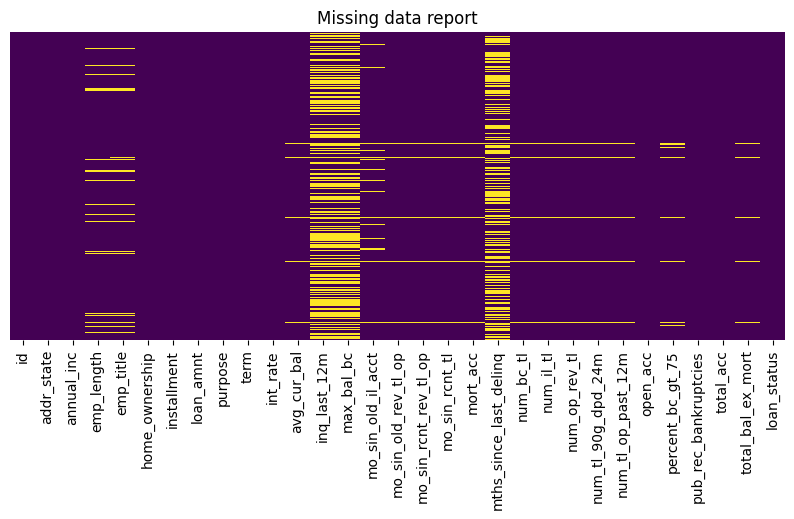

In [4]:
fig, ax1 = plt.subplots(figsize = (10,4))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis').set(title = 'Missing data report')
plt.show()

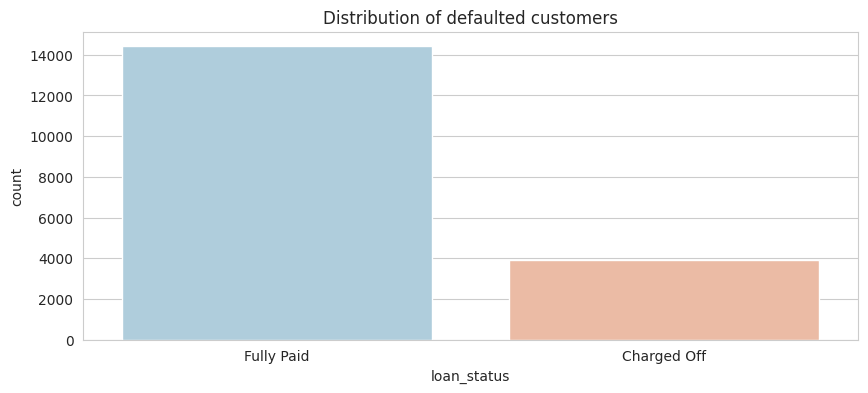

In [5]:
sns.set_style('whitegrid')
fig,ax1 = plt.subplots(figsize = (10,4))
sns.countplot(x='loan_status', data=df, palette = 'RdBu_r').set(title = 'Distribution of defaulted customers')
plt.show()

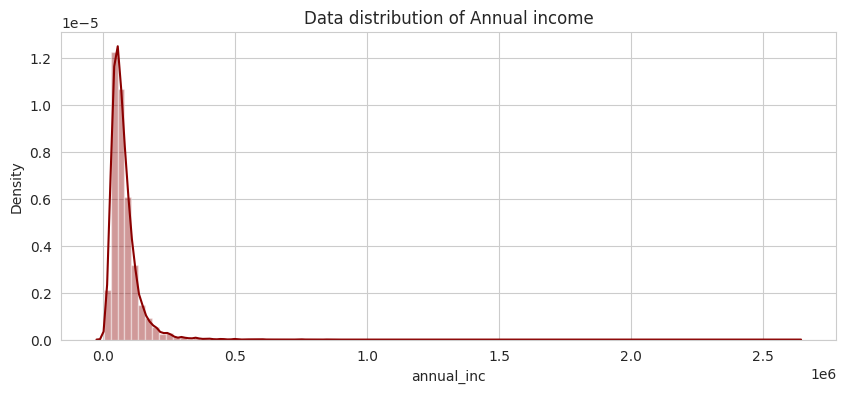

In [6]:
fig, ax1 = plt.subplots(figsize=(10,4))
sns.distplot(df['annual_inc'].dropna(),kde=True,color='darkred',bins=100).set(title='Data distribution of Annual income')
plt.show()

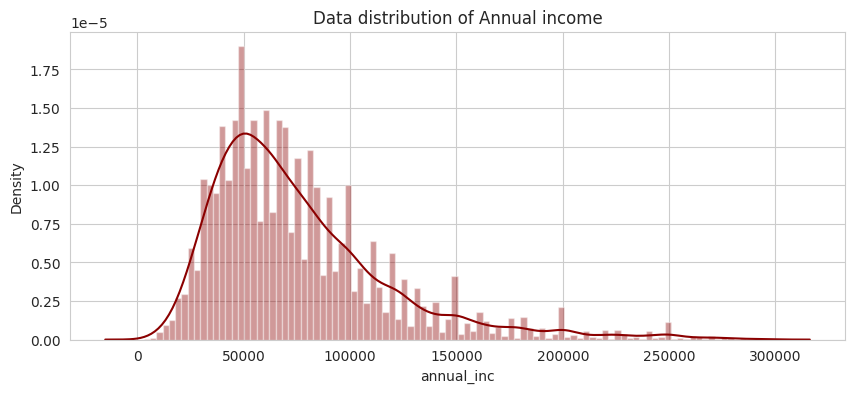

In [9]:
df = df[df['annual_inc'] < 300000]
fig, ax1 = plt.subplots(figsize=(10,4))
sns.distplot(df['annual_inc'].dropna(),kde=True,color='darkred',bins=100).set(title='Data distribution of Annual income')
plt.show()

In [14]:
df_grouped = df.groupby([pd.cut(df['annual_inc'], np.arange(0,1000.0+100000, 10000)),'loan_status']).size()
df_grouped_1 = df_grouped.groupby(level = 0).apply(lambda x:x/x.sum()*100).unstack(level = 'loan_status').reset_index()
df_grouped = df_grouped.groupby(level = 0).apply(lambda x:x).unstack(level='loan_status').reset_index()
df_grouped['Total']=df_grouped['Charged Off'] + df_grouped['Fully Paid']

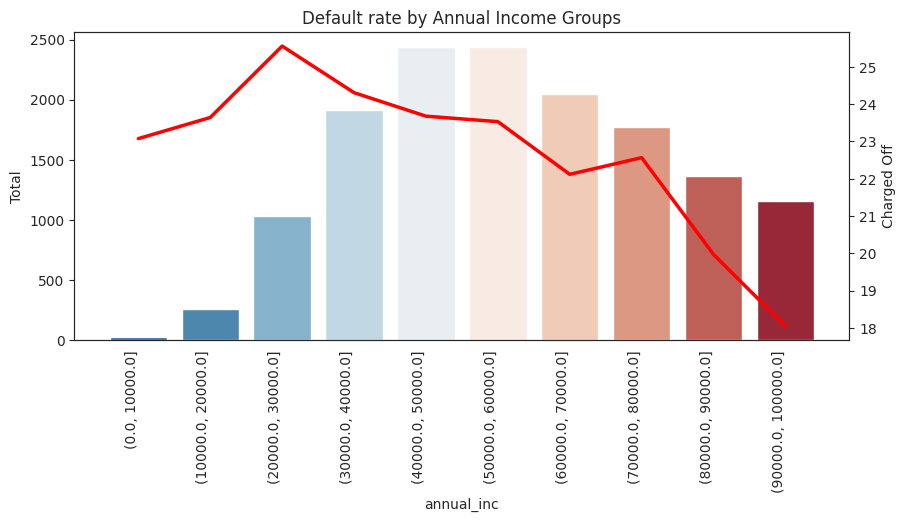

In [15]:
sns.set_style('white')
df_grouped = df_grouped.dropna()
df_grouped_1 = df_grouped_1.dropna()
fig,ax1 = plt.subplots(figsize = (10,4))
sns.barplot(data=df_grouped,x='annual_inc',y='Total',ax=ax1,palette = 'RdBu_r')
ax2 = ax1.twinx()
sns.lineplot(data = df_grouped_1,x = df_grouped_1['annual_inc'].astype(str), y = 'Charged Off', ax= ax2, color = 'r', linewidth = 2.5).set(title = 'Default rate by Annual Income Groups')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, horizontalalignment = 'right')
plt.show()

### 2.2 Public bankruptcies

In [ ]:
df_grouped = df.groupby(['pub_rec_bankruptices','loan_status'])